In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\alima\Desktop\Heart Attack prediction using python\Heart attack prediction1.csv")

In [4]:
df.head()

,age,Gender,sex,cp,Resting blood pressure(trestbps),Cholesterol(mg/dl),fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num (Target)
0,28,Male,1,2,130,132,0,2,185,0,0.0,0,0,0,0
1,29,Male,1,2,120,243,0,0,160,0,0.0,0,0,0,0
2,29,Male,1,2,140,0,0,0,170,0,0.0,0,0,0,0
3,30,Female,0,1,170,237,0,1,170,0,0.0,0,0,6,0
4,31,Female,0,2,100,219,0,1,150,0,0.0,0,0,0,0


In [5]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df.describe()

,age,sex,cp,Cholesterol(mg/dl),fbs,thalach,exang,oldpeak,slope,ca,thal,num (Target)
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.0,293.000000,293.000000
mean,47.767918,0.723549,2.979522,231.075085,0.068259,138.737201,0.300341,0.584642,0.665529,0.0,0.539249,0.358362
std,7.760150,0.448007,0.964928,93.780463,0.252622,24.912227,0.459191,0.909879,0.927550,0.0,1.732840,0.480340
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,42.000000,0.000000,2.000000,198.000000,0.000000,122.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,49.000000,1.000000,3.000000,237.000000,0.000000,140.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,54.000000,1.000000,4.000000,277.000000,0.000000,155.000000,1.000000,1.000000,2.000000,0.0,0.000000,1.000000
max,66.000000,1.000000,4.000000,603.000000,1.000000,190.000000,1.000000,5.000000,3.000000,0.0,7.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               293 non-null    int64  
 1   Gender                            293 non-null    object 
 2   sex                               293 non-null    int64  
 3   cp                                293 non-null    int64  
 4   Resting blood pressure(trestbps)  293 non-null    object 
 5   Cholesterol(mg/dl)                293 non-null    int64  
 6   fbs                               293 non-null    int64  
 7   restecg                           293 non-null    object 
 8   thalach                           293 non-null    int64  
 9   exang                             293 non-null    int64  
 10  oldpeak                           293 non-null    float64
 11  slope                             293 non-null    int64  
 12  ca      

In [8]:
print(df['fbs'].value_counts(dropna=False))  # Include NaN counts

fbs
0    273
1     20
Name: count, dtype: int64


In [9]:
# Handle non-numeric values (e.g., drop rows with NaN)
df.dropna(subset=['fbs'], inplace=True) 

# Convert to integer (if applicable)
df['fbs'] = pd.to_numeric(df['fbs'], errors='coerce') 

# Print data types
print(df.dtypes)

age                                   int64
Gender                               object
sex                                   int64
cp                                    int64
Resting blood pressure(trestbps)     object
Cholesterol(mg/dl)                    int64
fbs                                   int64
restecg                              object
thalach                               int64
exang                                 int64
oldpeak                             float64
slope                                 int64
ca                                    int64
thal                                  int64
num (Target)                          int64
dtype: object


In [10]:
print(list(df.columns)) 


['age', 'Gender', 'sex', 'cp', 'Resting blood pressure(trestbps)', 'Cholesterol(mg/dl)', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num (Target)']


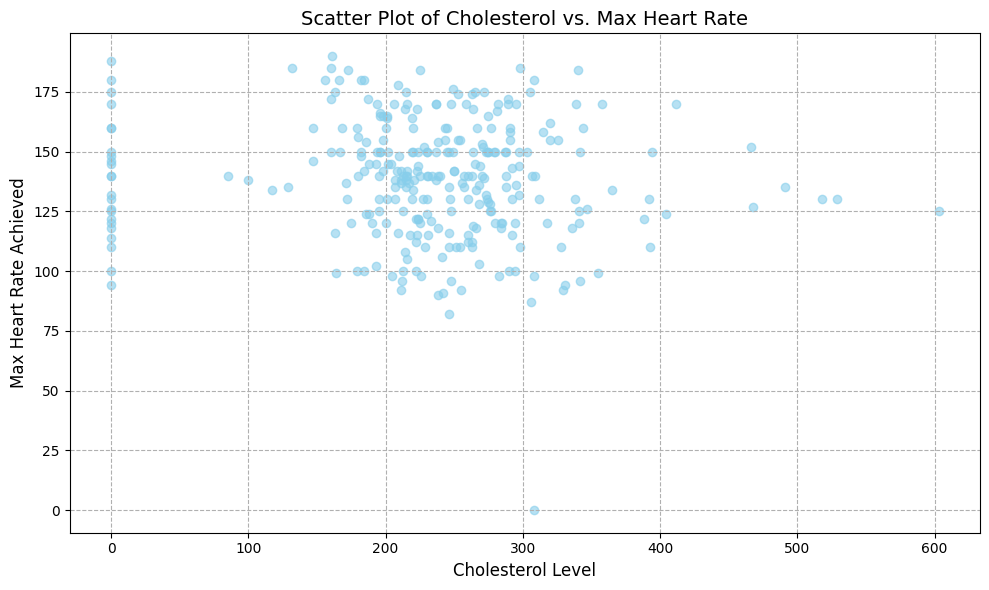

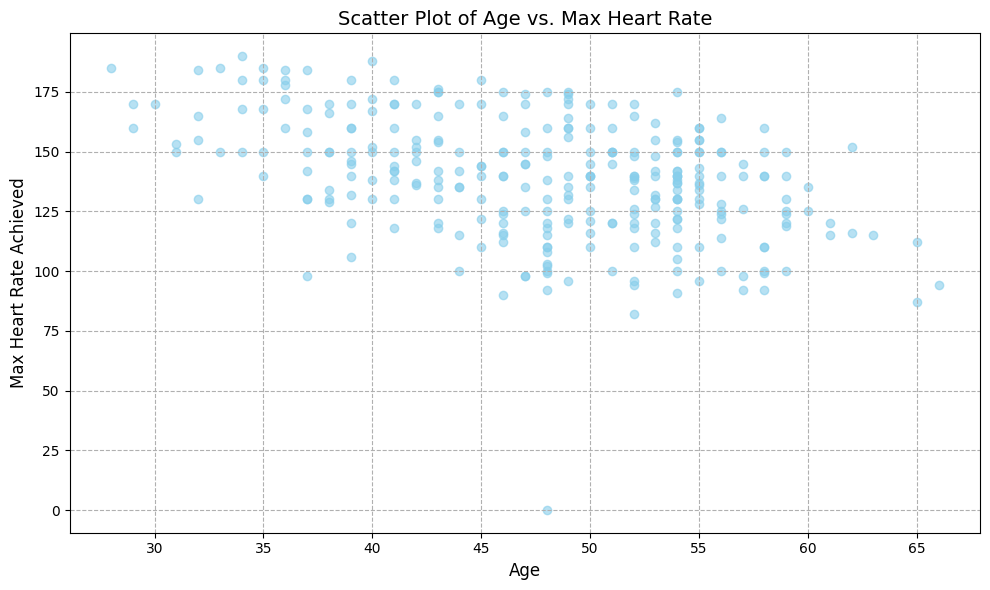

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def create_scatter_plot(df, x_column, y_column, title, x_label, y_label):
    """Creates and displays a scatter plot."""
    plt.figure(figsize=(10, 6))  
    plt.scatter(df[x_column], df[y_column], alpha=0.6, color='skyblue') 
    plt.title(title, fontsize=14)  # Set plot title
    plt.xlabel(x_label, fontsize=12)  # Set x-axis label
    plt.ylabel(y_label, fontsize=12)  # Set y-axis label
    plt.grid(True, linestyle='--')  # Add a grid for easier reading
    plt.tight_layout() # Adjust the layout so that elements do not overlap
    plt.show()


# Create scatter plot for 'chol' vs. 'thalach'
create_scatter_plot(df,
                    'Cholesterol(mg/dl)',
                    'thalach',
                    'Scatter Plot of Cholesterol vs. Max Heart Rate',
                    'Cholesterol Level',
                    'Max Heart Rate Achieved')


# Create scatter plot for 'age' vs. 'thalach'
create_scatter_plot(df,
                    'age',
                    'thalach',
                    'Scatter Plot of Age vs. Max Heart Rate',
                    'Age',
                    'Max Heart Rate Achieved')

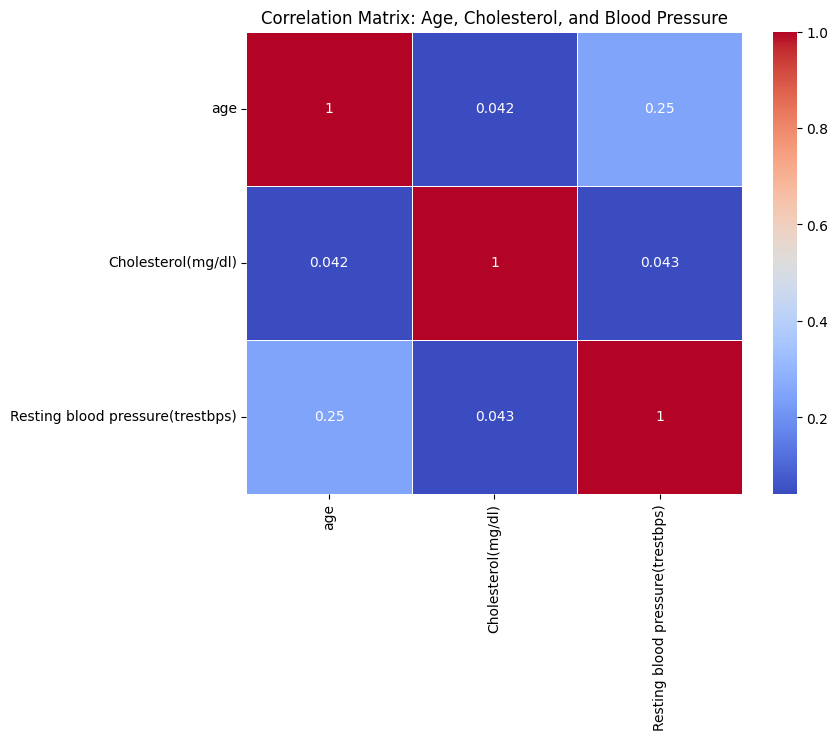

In [12]:
# Handle non-numeric values (replace '?' with NaN)
df[['Cholesterol(mg/dl)', 'Resting blood pressure(trestbps)']] = df[['Cholesterol(mg/dl)', 'Resting blood pressure(trestbps)']].replace('?', np.nan)

# Convert to numeric (if applicable, errors will be converted to NaN)
df['Cholesterol(mg/dl)'] = pd.to_numeric(df['Cholesterol(mg/dl)'], errors='coerce')
df['Resting blood pressure(trestbps)'] = pd.to_numeric(df['Resting blood pressure(trestbps)'], errors='coerce')

# Check for and handle missing values 
if 'thalach' in df.columns:
    df.dropna(subset=['Cholesterol(mg/dl)', 'Resting blood pressure(trestbps)', 'thalach'], inplace=True)
else:
    print("Warning: 'thalach' column not found in df. Skipping dropping rows based on 'thalach'.")

# Select the relevant columns for the correlation matrix
selected_columns = ['age', 'Cholesterol(mg/dl)', 'Resting blood pressure(trestbps)']
correlation_matrix = df[selected_columns].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Age, Cholesterol, and Blood Pressure')
plt.show()

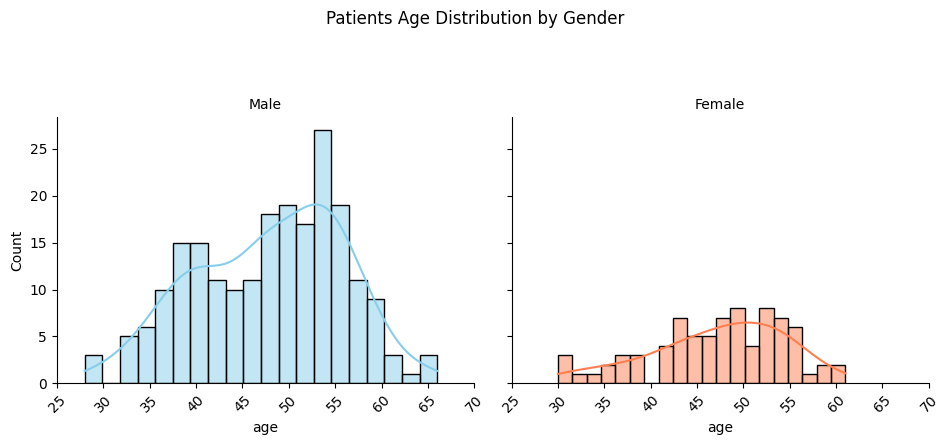

In [13]:
gender_colors = {'Male': 'skyblue', 'Female': 'coral'}  # Define colors 

def get_color(gender):
         return gender_colors.get(gender, 'gray')  # Return default color for unknown genders

    # Create the FacetGrid
g = sns.FacetGrid(df, col='Gender', height=4, aspect=1.2)

    # Get the color list and iterate through each subplot to create different colors
for ax, gender in zip(g.axes.flat, df['Gender'].unique()):
        sns.histplot(x='age', kde=True, bins=20, data=df[df['Gender'] == gender], color=get_color(gender), ax = ax)

    # Customize the plot
g.fig.suptitle('Patients Age Distribution by Gender', y=1.1)  #Adjust title position to prevent overlap
    #g.fig.subplots_adjust(top=0.8) 
g.set_xticklabels(rotation=45)
g.set_titles(col_template = "{col_name}") #Adjust column titles
plt.tight_layout()
plt.show()

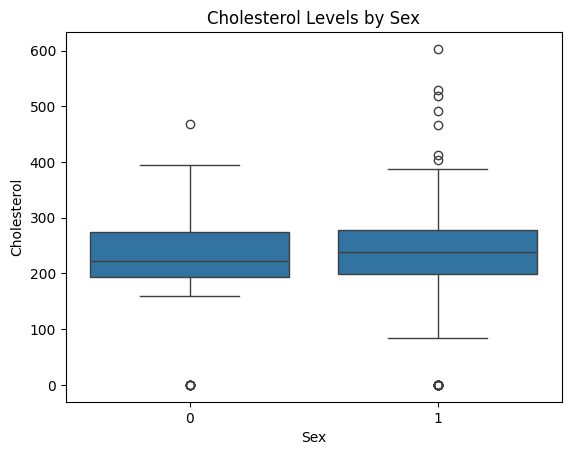

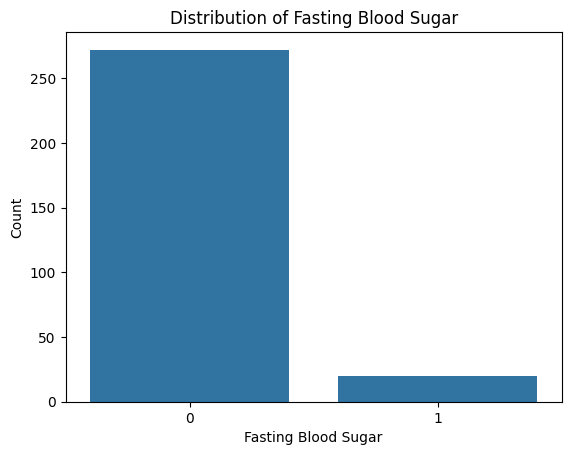

In [14]:
# Box plot for 'cholesterol' by 'sex'
sns.boxplot(x='sex', y='Cholesterol(mg/dl)', data=df)
plt.title('Cholesterol Levels by Sex')
plt.xlabel('Sex')
plt.ylabel('Cholesterol')
plt.show()

# Bar plot for 'fbs' (fasting blood sugar)
sns.countplot(x='fbs', data=df)
plt.title('Distribution of Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.show()



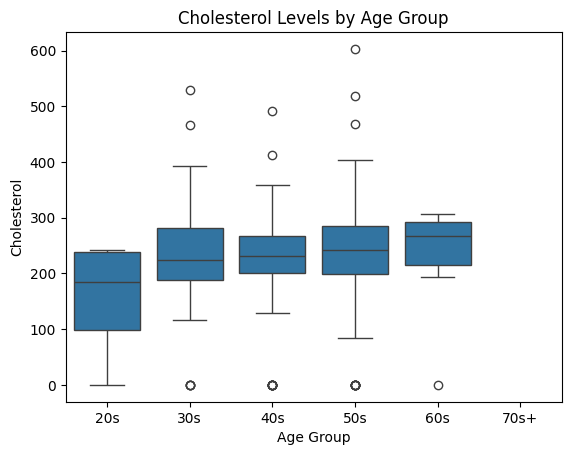

In [15]:
# Create age groups (example: categorize age into decades)
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20s', '30s', '40s', '50s', '60s', '70s+'])

# Box plot for 'cholesterol' by age group
sns.boxplot(x='age_group', y='Cholesterol(mg/dl)', data=df)
plt.title('Cholesterol Levels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Cholesterol')
plt.show()

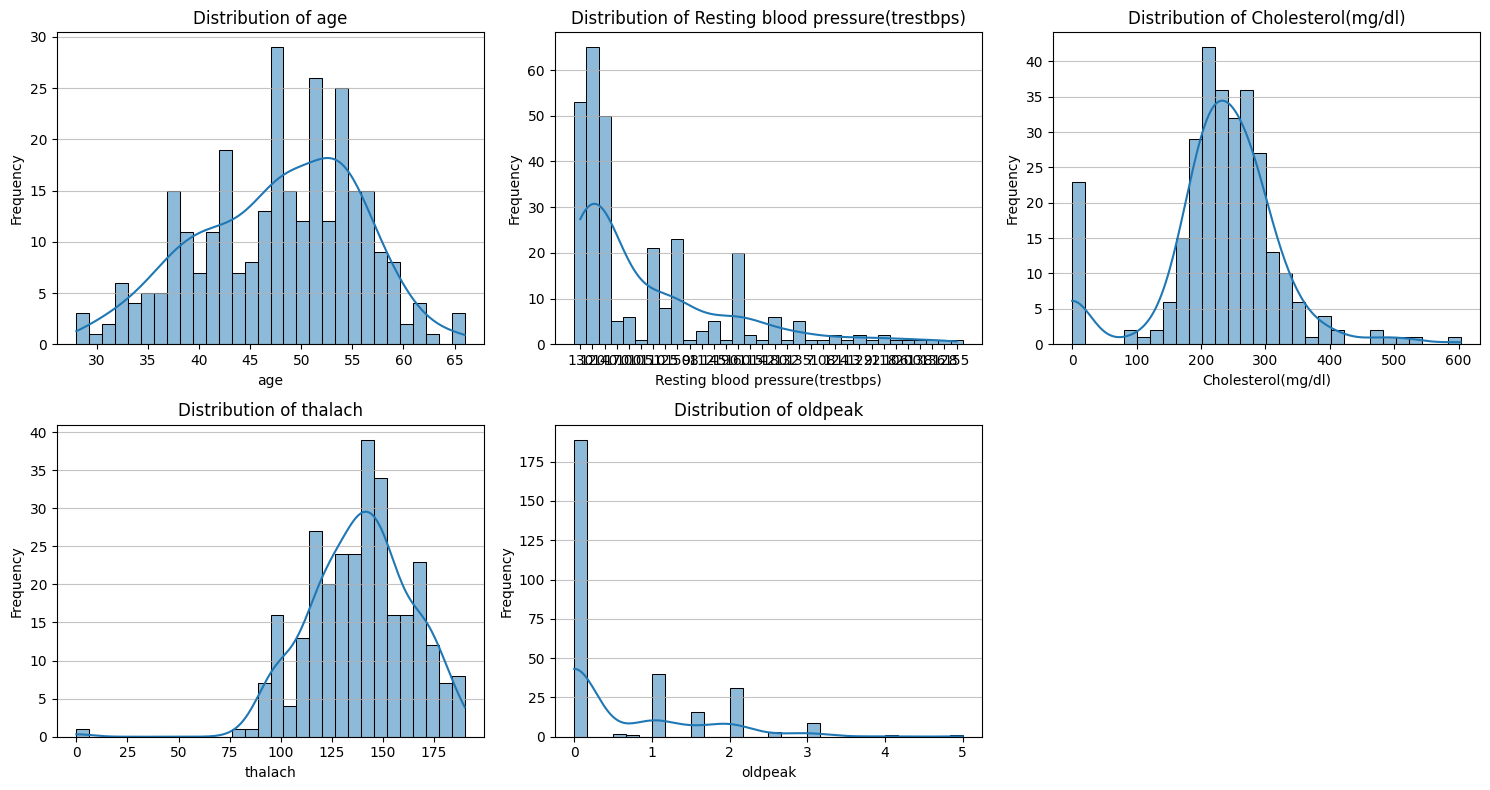

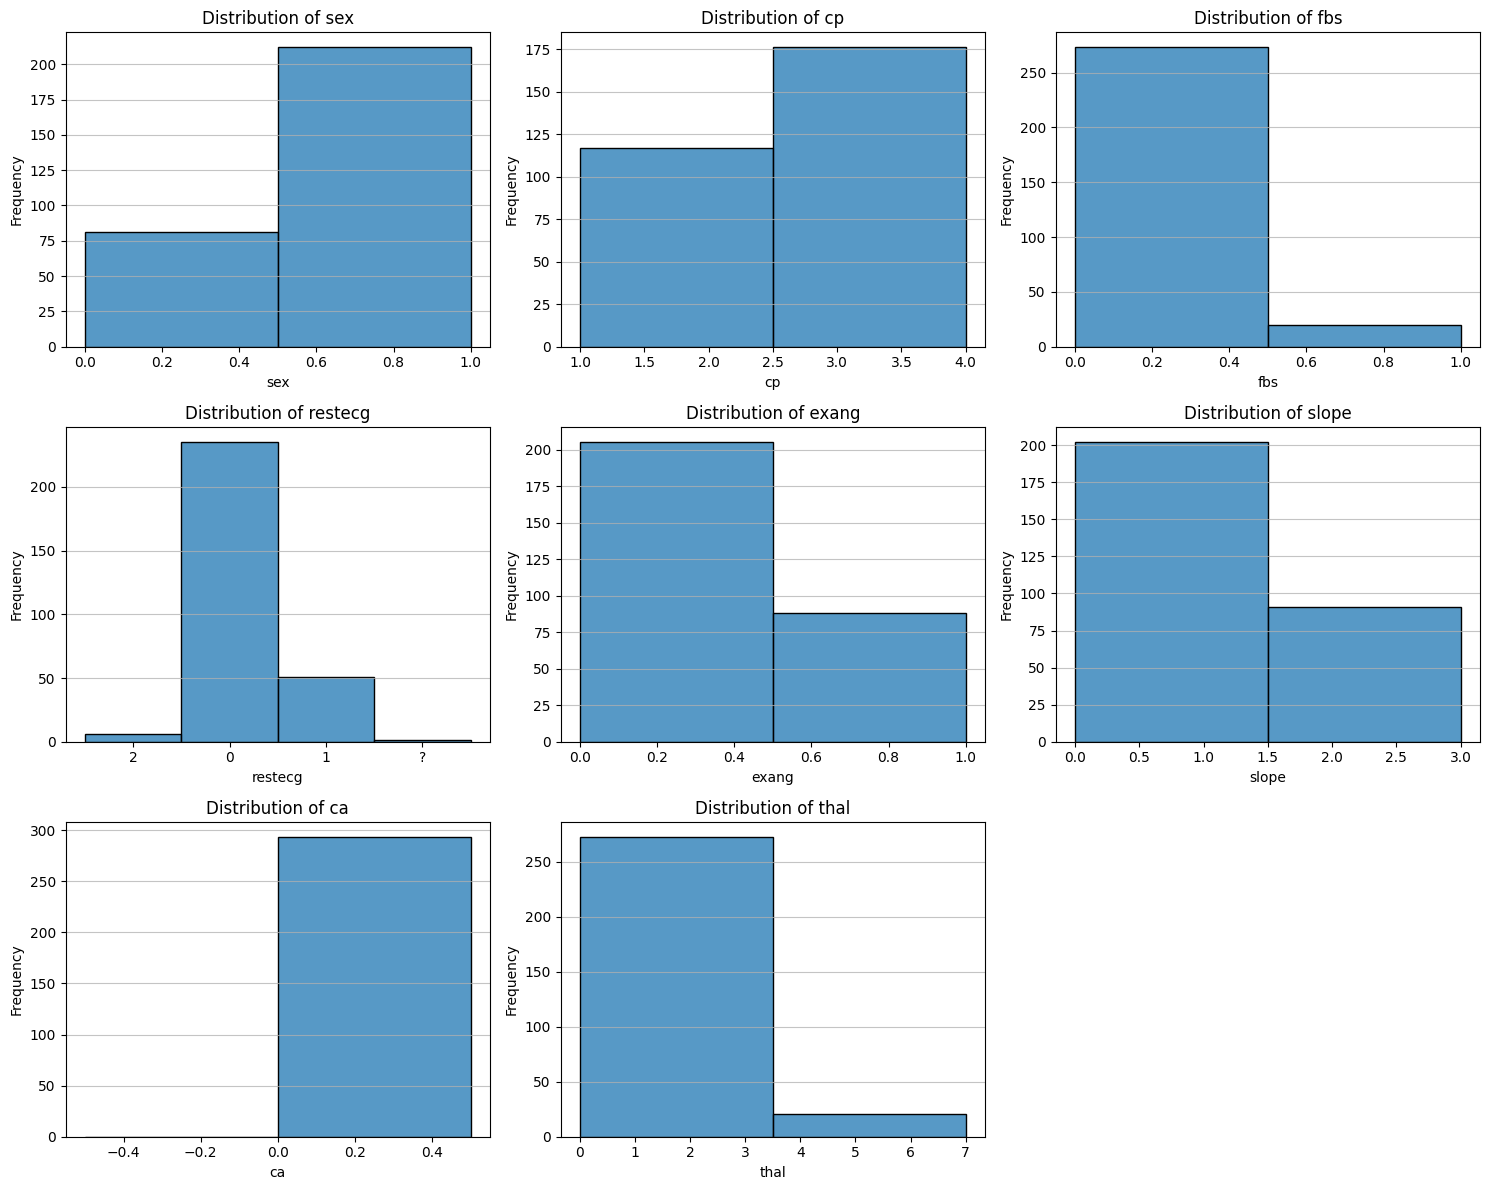

In [16]:
ef plot_histograms(df, features, bins=20, figsize=(12, 8), kde=False):
    """
    Generates and displays histograms for specified features in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        features (list): A list of feature names (column names) to plot.
        bins (int): The number of bins in the histogram. Default is 20.
        figsize (tuple): The figure size of the plots. Default is (12, 8).
        kde (bool): Whether to overlay a kernel density estimate plot. Default is False.
    """
    num_features = len(features)
    # Determine number of rows based on number of features
    num_rows = (num_features + 2) // 3  # Calculate rows needed for subplots (max 3 cols)
    plt.figure(figsize=(15, 4 * num_rows))  # Adjust height based on number of rows

    for i, feature in enumerate(features):
        plt.subplot(num_rows, 3, i + 1)
        sns.histplot(df[feature], bins=bins, kde=kde)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)  # Add horizontal grid lines


    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    
    try:
      df = pd.read_csv(r"C:\Users\alima\Desktop\Heart Attack prediction using python\Heart attack prediction1.csv")
    except FileNotFoundError:
      print("Error: The data file 'heart_attack_data.csv' was not found. Please make sure it exists in the same directory as your script or provide the correct path.")
      exit()

    # Example usage: Specify the features you want to visualize
    features_to_plot = ['age','Resting blood pressure(trestbps)' , 'Cholesterol(mg/dl)', 'thalach', 'oldpeak']

    # Plot the histograms for these features
    plot_histograms(df, features_to_plot, bins=30, kde=True) 

    # Plot histograms for categorical variables
    categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
    plot_histograms(df, categorical_features, bins=len(df[categorical_features[0]].unique()), kde=False)

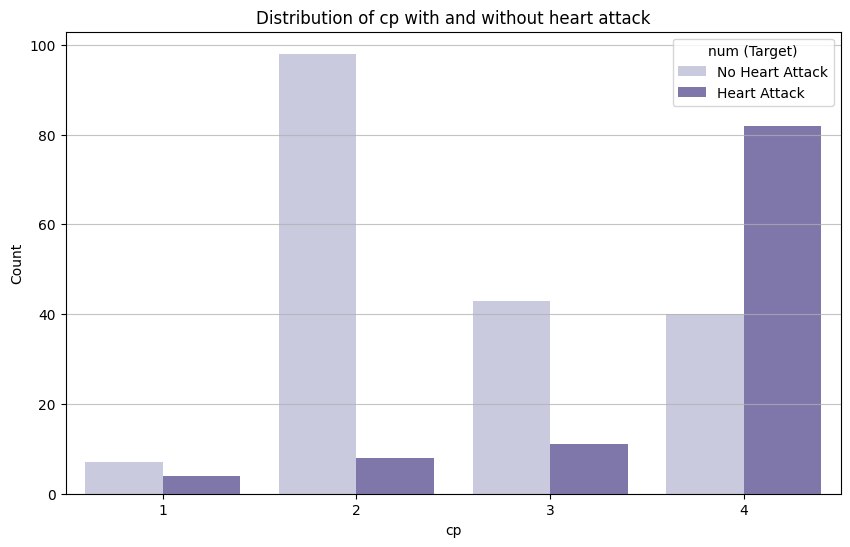

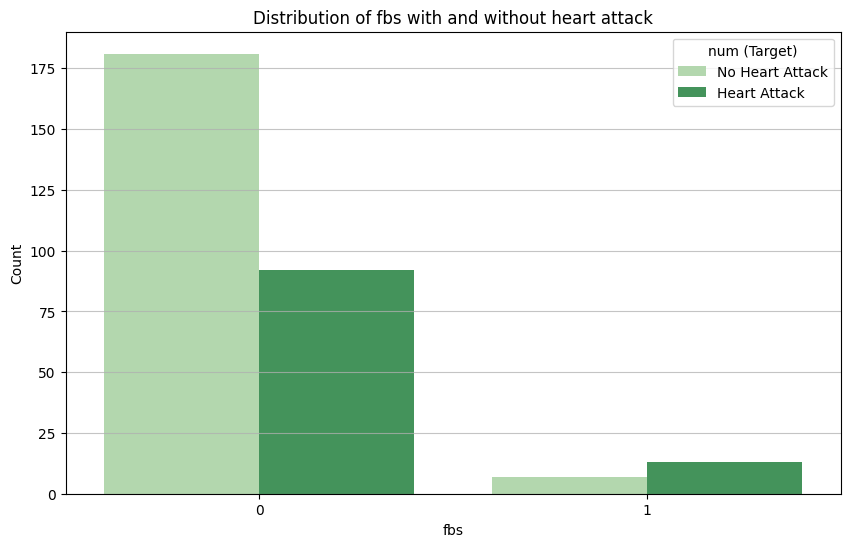

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_comparison_charts(df, feature, target, figsize=(10, 6), palette=None):
    """
    Generates and displays a bar chart or count plot comparing a feature with a target variable.

    Args:
        df (pd.DataFrame): The input DataFrame.
        feature (str): The column name for the feature to be plotted.
        target (str): The column name for the target variable (heart attack indicator).
        figsize (tuple): The figure size of the plots. Default is (10, 6).
        palette (str or list): The color palette to use.
    """

    plt.figure(figsize=figsize)
    # Check if the target column has any valid data
    if df[target].dropna().empty:
      print(f"Warning: The target column '{target}' is empty or contains only NaN values. Skipping plot for {feature}")
      return
    sns.countplot(data=df, x=feature, hue=target, palette=palette) #use countplot for clear counts
    plt.title(f'Distribution of {feature} with and without heart attack')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title=target, labels=['No Heart Attack', 'Heart Attack'])
    plt.grid(axis='y', alpha=0.75)  # Add horizontal grid lines
    plt.show()


if __name__ == '__main__':
 
    try:
        df = pd.read_csv(r"C:\Users\alima\Desktop\Heart Attack prediction using python\Heart attack prediction1.csv")
    except FileNotFoundError:
        print("Error: The data file 'heart_attack_data.csv' was not found. Please make sure it exists in the same directory as your script or provide the correct path.")
        exit()

    # Verify that 'num (Target)' exists in the DataFrame
    target_column = 'num (Target)'
    if target_column not in df.columns:
        print(f"Error: The '{target_column}' (heart attack indicator) column was not found in your data frame. Please make sure this column exists and is named correctly. If the name is different, modify the target in the plot_comparison_charts function")
        exit()

    # Create the comparison bar plots
    features_to_compare = ['cp', 'fbs'] #Features that you would like to visualize
    palettes = ['Purples', 'Greens']  # Define your color palettes

    for i, feature in enumerate(features_to_compare):
        if feature in df.columns:
            if i < len(palettes):
                plot_comparison_charts(df, feature, target_column, palette=palettes[i])
            else:
                plot_comparison_charts(df, feature, target_column, palette='Paired') #default pallete for remaining plots.
        else:
            print(f"Warning: The feature column '{feature}' was not found. Skipping this plot.")

<Figure size 1000x600 with 0 Axes>

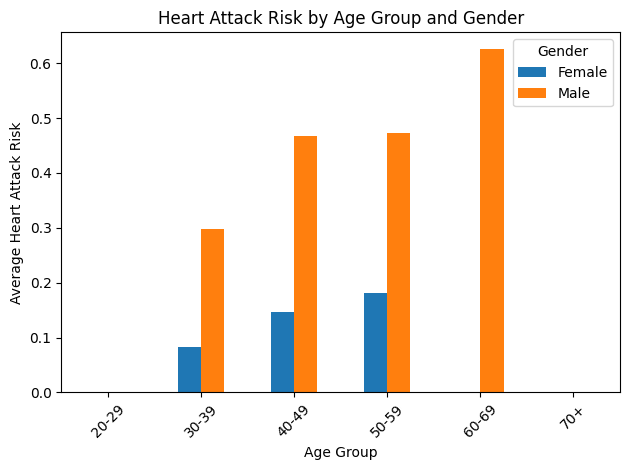

In [22]:
# Calculate heart attack risk by age group and gender
heart_attack_risk_by_age_gender = df.groupby(['age_group', 'sex'])['num (Target)'].mean()
  
# Visualize heart attack risk by age group and gender
plt.figure(figsize=(10, 6))
heart_attack_risk_by_age_gender.unstack().plot(kind='bar')
plt.title('Heart Attack Risk by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Heart Attack Risk')
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.tight_layout()
plt.show()


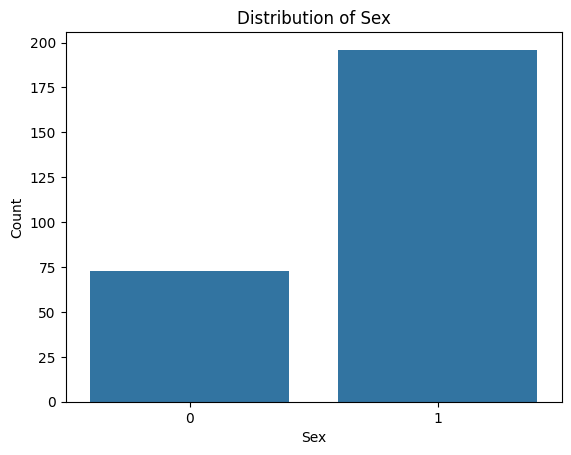

In [ ]:
# Bar plot for 'sex' 
if 'sex' in df.columns:
    sns.countplot(x='sex', data=df)
    plt.title('Distribution of Sex')
    plt.xlabel('Sex')
    plt.ylabel('Count')
    plt.show()




In [ ]:
import pandas as pd
import plotly.express as px

# (1 for heart disease, 0 for no heart disease)
fig = px.histogram(df, x="age", color="num (Target)", 
                title="Age Distribution by Heart Disease Status",
                labels={"age": "Age", "target": "Heart Disease (1=Yes, 0=No)"})
fig.show()

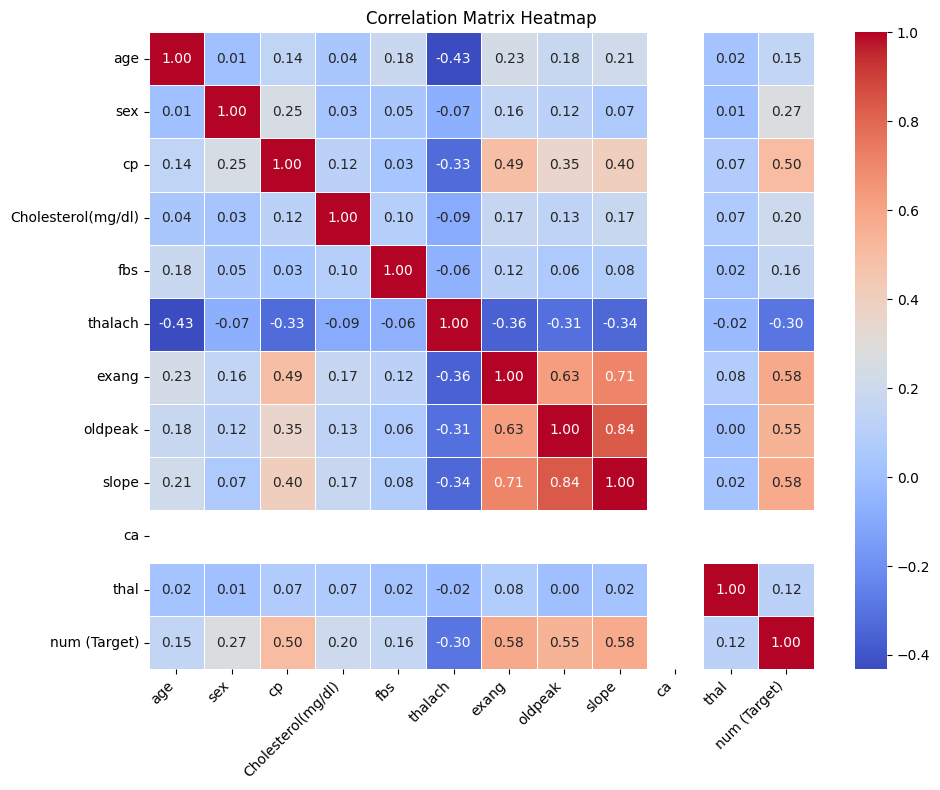

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_heatmap(df, figsize=(10, 8)):
    """
    Generates and displays a heatmap of the correlation matrix for a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        figsize (tuple): The figure size of the plot. Default is (10, 8).
    """

    corr_matrix = df.corr()  # Calculate the correlation matrix

    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix Heatmap')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    # Load your heart attack dataset (replace 'heart_attack_data.csv' with your file path)
    try:
        df = pd.read_csv(r"C:\Users\alima\Desktop\Heart Attack prediction using python\Heart attack prediction1.csv")
    except FileNotFoundError:
        print("Error: The data file 'heart_attack_data.csv' was not found. Please make sure it exists in the same directory as your script or provide the correct path.")
        exit()

    # Select only numerical columns for the correlation matrix, to avoid type errors
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    df_numerical = df[numerical_columns]
    if df_numerical.empty:
      print("Error: There were no numerical columns to create a correlation matrix. Please check your data.")
      exit()
    # Plot the correlation heatmap
    plot_correlation_heatmap(df_numerical)

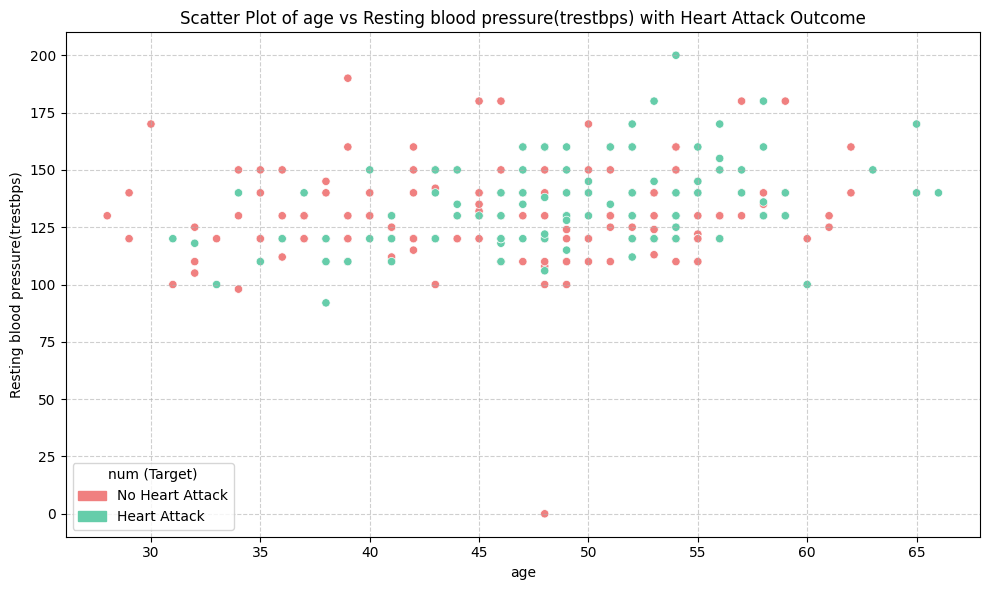

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches  # Import mpatches for creating custom legend

def plot_correlated_features_scatter(df, feature_x, feature_y, target, figsize=(10, 6)):
    """
    Generates and displays a scatter plot comparing two features, color-encoded by a target,
    with a custom legend.

    Args:
        df (pd.DataFrame): The input DataFrame.
        feature_x (str): The column name for the x-axis feature.
        feature_y (str): The column name for the y-axis feature.
        target (str): The column name for the target variable (heart attack indicator).
        figsize (tuple): The figure size of the plots. Default is (10, 6).
    """

    plt.figure(figsize=figsize)
    # Set colors for 'no heart attack' and 'heart attack'
    colors = {0: '#F08080', 1: '#66CDAA'}  # You can choose your preferred colors here
    scatter = sns.scatterplot(
        data=df, x=feature_x, y=feature_y, hue=target, palette=colors, legend = False  #remove the seaborn legend so we can create our own
    )
    plt.title(f'Scatter Plot of {feature_x} vs {feature_y} with Heart Attack Outcome')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)


    # Create custom legend handles and labels
    handles = [mpatches.Patch(color=colors[0], label='No Heart Attack'),
                mpatches.Patch(color=colors[1], label='Heart Attack')]

    # Create custom legend
    plt.legend(handles=handles, title=target, loc='lower left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    # Load your heart attack dataset (replace 'heart_attack_data.csv' with your file path)
    try:
        df = pd.read_csv(r"C:\Users\alima\Desktop\Heart Attack prediction using python\Heart attack prediction1.csv")
    except FileNotFoundError:
        print("Error: The data file 'heart_attack_data.csv' was not found. Please make sure it exists in the same directory as your script or provide the correct path.")
        exit()

    # Verify that 'num' (target) exists in the DataFrame
    target_column = 'num (Target)'
    if target_column not in df.columns:
      print(f"Error: The '{target_column}' (heart attack indicator) column was not found in your data frame. Please make sure this column exists and is named correctly. If the name is different, modify the target in the plot_correlated_features_scatter function")
      exit()

    # Choose highly correlated features to visualize (replace with your chosen features)
    feature_x = 'age'
    feature_y = 'Resting blood pressure(trestbps)'  # Replace with the actual column name for blood pressure in your dataset


    # Verify the features to be plotted exist
    if feature_x not in df.columns:
        print(f"Error: The feature column '{feature_x}' was not found. Please check your columns.")
        exit()
    if feature_y not in df.columns:
        print(f"Error: The feature column '{feature_y}' was not found. Please check your columns.")
        exit()

    # Plot the scatter plot
    plot_correlated_features_scatter(df, feature_x, feature_y, 'num (Target)')

Columns before subsetting:
Index(['age', 'Gender', 'Resting blood pressure(trestbps)',
       'Cholesterol(mg/dl)', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal', 'num (Target)', 'sex_1', 'cp_2', 'cp_3', 'cp_4'],
      dtype='object')


<Figure size 1000x800 with 0 Axes>

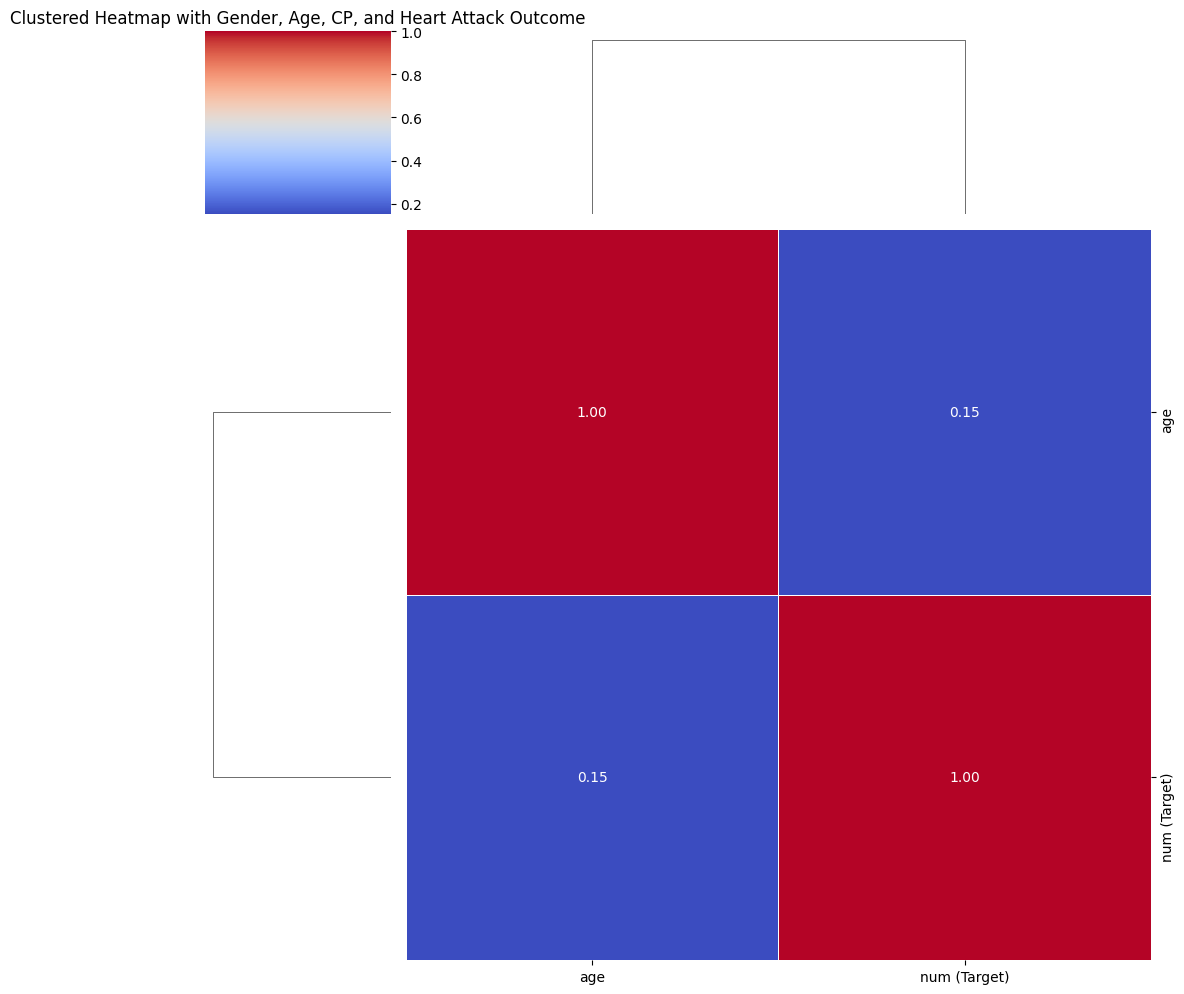

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
    import scipy
except ImportError:
    print("Error: The 'scipy' library is required for sns.clustermap but is not installed. Please install scipy using `pip install scipy`.")
    exit()

def plot_clustered_heatmap(df, features, target, figsize=(10, 8)):
    """
    Generates and displays a hierarchically clustered heatmap for specified features
    and a target variable.

    Args:
        df (pd.DataFrame): The input DataFrame.
        features (list): A list of feature names to include in the heatmap.
        target (str): The column name for the target variable (heart attack indicator).
        figsize (tuple): The figure size of the plot. Default is (10, 8).
    """

    # Ensure the features and the target are present in the DataFrame
    for feature in features:
        if feature not in df.columns:
            print(f"Error: The feature column '{feature}' was not found in your DataFrame. Skipping heatmap.")
            return

    if target not in df.columns:
        print(f"Error: The target column '{target}' was not found in your DataFrame. Skipping heatmap.")
        return

    # Create a copy to avoid modifying the original DataFrame
    df_copy = df.copy()

    # Preprocess categorical features using one-hot encoding
    categorical_features = ['sex','cp']  # You may need to modify this according to your data.
    df_copy = pd.get_dummies(df_copy, columns=categorical_features, drop_first=True)

    # Select all numeric columns from the selected features and the target column
    numeric_cols = df_copy.select_dtypes(include=['number']).columns.tolist()
    combined_cols = [col for col in numeric_cols if col in features or col == target]

    if not combined_cols:
      print("Error: No valid numeric columns selected. Check your features and target column.")
      return

    print("Columns before subsetting:")
    print(df_copy.columns)

    # Select columns, drop NaN values
    df_subset = df_copy[combined_cols].dropna()


    if df_subset.empty:
        print("Error: No valid data for the heatmap. Ensure you have numeric data for specified columns.")
        return


    # Convert to numeric and remove NaNs
    for col in df_subset.columns:
      df_subset[col] = pd.to_numeric(df_subset[col], errors = 'coerce')

    df_subset = df_subset.dropna(axis=1)
    if df_subset.empty:
       print("Error: No valid numeric data for the heatmap. Ensure all features and the target are numeric.")
       return
    # Compute the correlations
    try:
        corr = df_subset.corr()
    except Exception as e:
        print(f"Error: An error occurred during correlation calculation: {e}")
        return

    plt.figure(figsize=figsize)
    try:
        sns.clustermap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
        plt.title('Clustered Heatmap with Gender, Age, CP, and Heart Attack Outcome')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error: An error occurred when creating the heatmap: {e}")



if __name__ == '__main__':
    # Load your heart attack dataset (replace 'heart_attack_data.csv' with your file path)
    try:
        df = pd.read_csv(r"C:\Users\alima\Desktop\Heart Attack prediction using python\Heart attack prediction1.csv")
    except FileNotFoundError:
        print("Error: The data file 'heart_attack_data.csv' was not found. Please make sure it exists in the same directory as your script or provide the correct path.")
        exit()

    # Define features and target column
    features_to_cluster = ['age','sex', 'cp']
    target_variable = 'num (Target)'  # Corrected target column name
    plot_clustered_heatmap(df, features_to_cluster, target_variable)